In [3]:
#packages
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\Hp15\Desktop\copper_modelling\Copper_Set.xlsx - Result 1.csv")
df

C:\Users\Hp15\AppData\Local\Temp\ipykernel_11176\2315473416.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Hp15\Desktop\copper_modelling\Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
#checking the null values in this dataframe
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [8]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [9]:

# convert the data type from object to numeric
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [10]:

# convert the data type from object to numeric
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  df[i]=pd.to_numeric(df[i],errors='coerce')
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0,2021-04-01,2021-04-01


In [11]:

# check any null values in data
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [12]:

# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [13]:
# check null values for all features
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery date_1         3
dtype: int64

In [14]:

# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [15]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [16]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181668.0,5.875066e+03,2.349107e+06,1.000000e-05,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181665.0,1.918124e+03,3.318020e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [17]:
# check null values for all features
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [18]:

# Handling null values using median and mode
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset

# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)



In [19]:

#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [20]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [21]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [22]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [23]:
df['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [24]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df['country'] = OrdinalEncoder().fit_transform(df[['country']])
df
   

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,3.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,0.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,4.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,5.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,3.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,0.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,0.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,0.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,0.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [25]:
# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [26]:

# final verification of null values after encoding
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [27]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,5.081680e+00,4.280604e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+01,1.600000e+01
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [28]:

# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

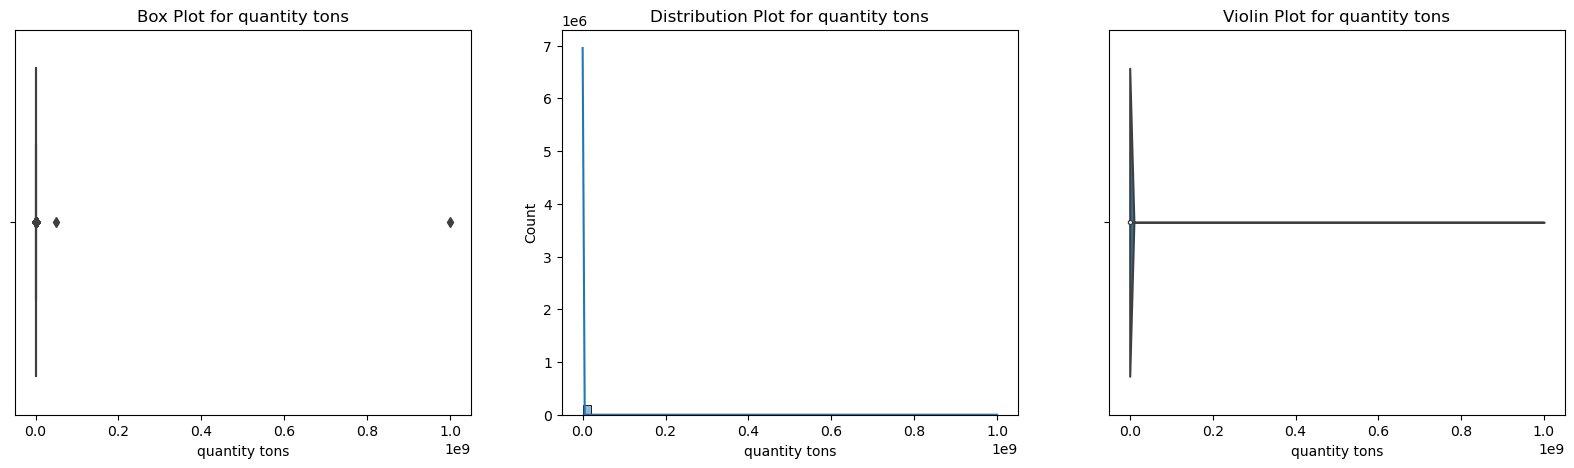

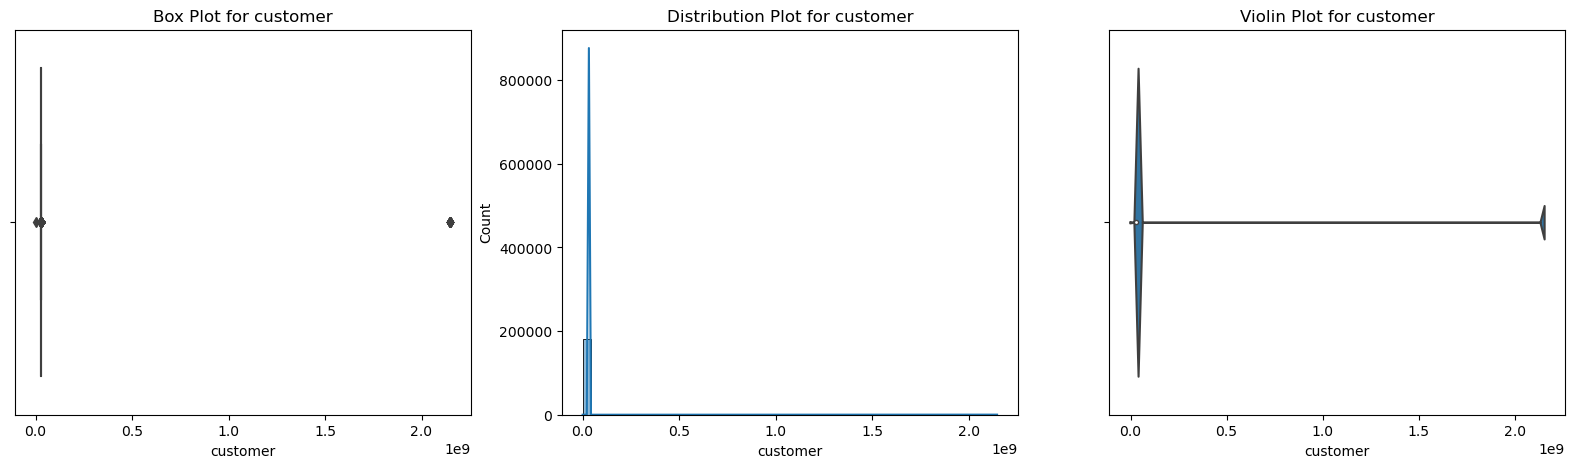

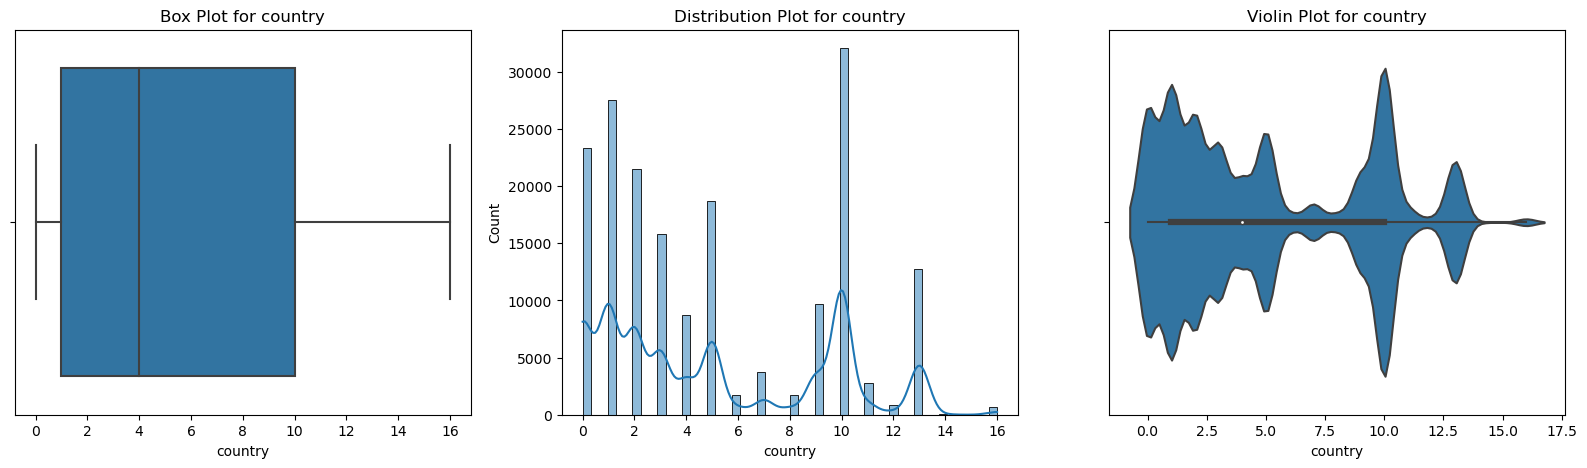

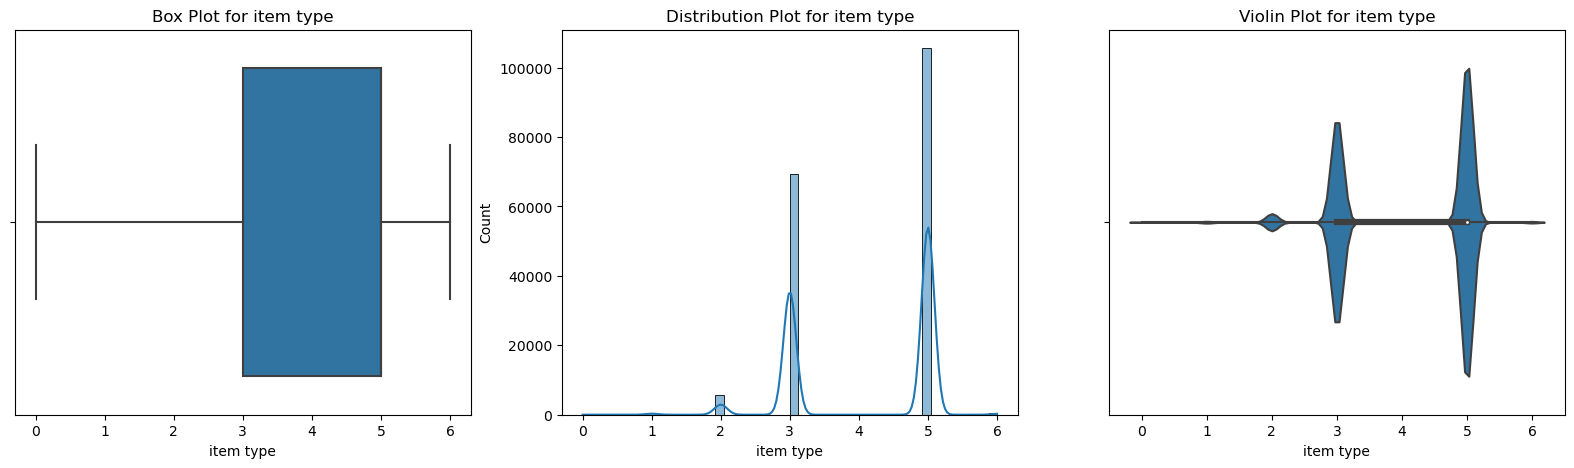

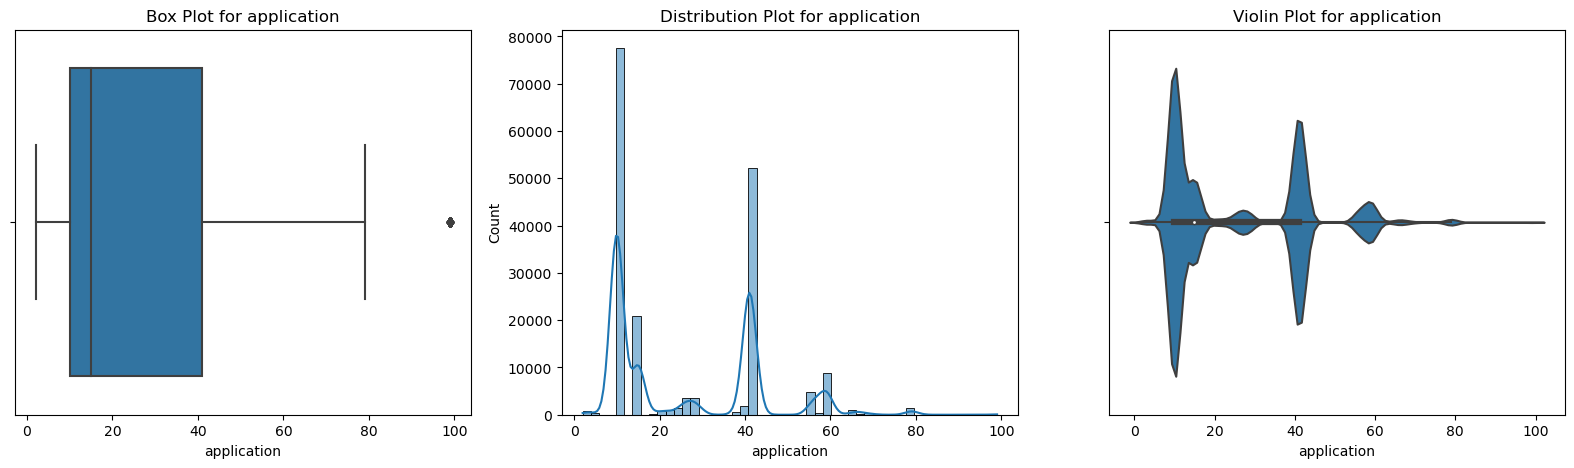

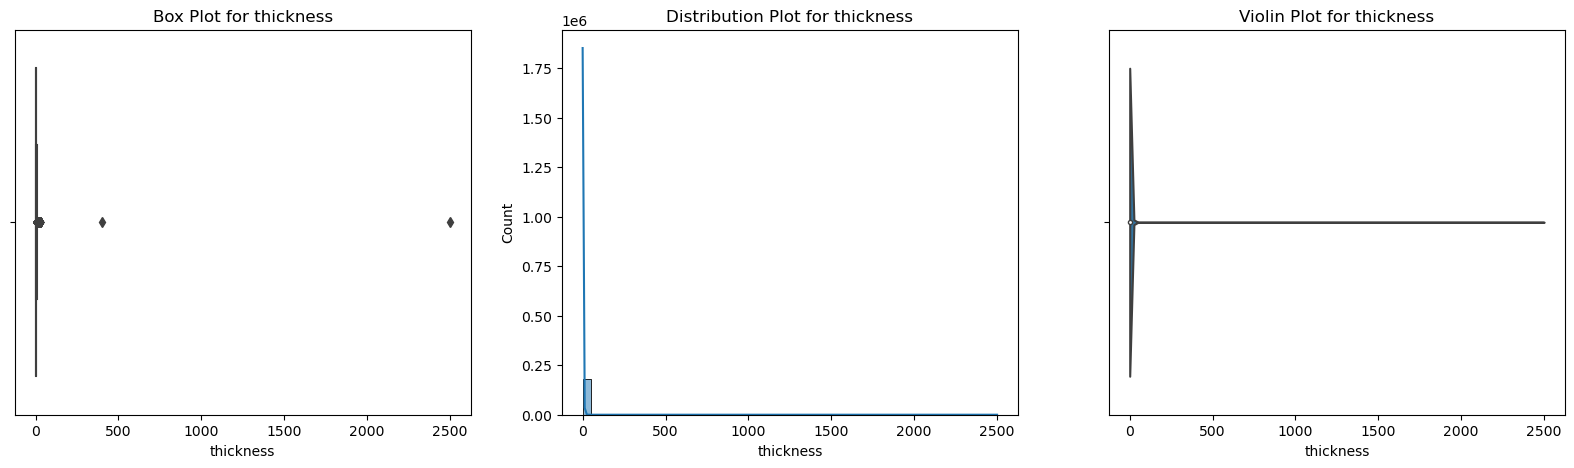

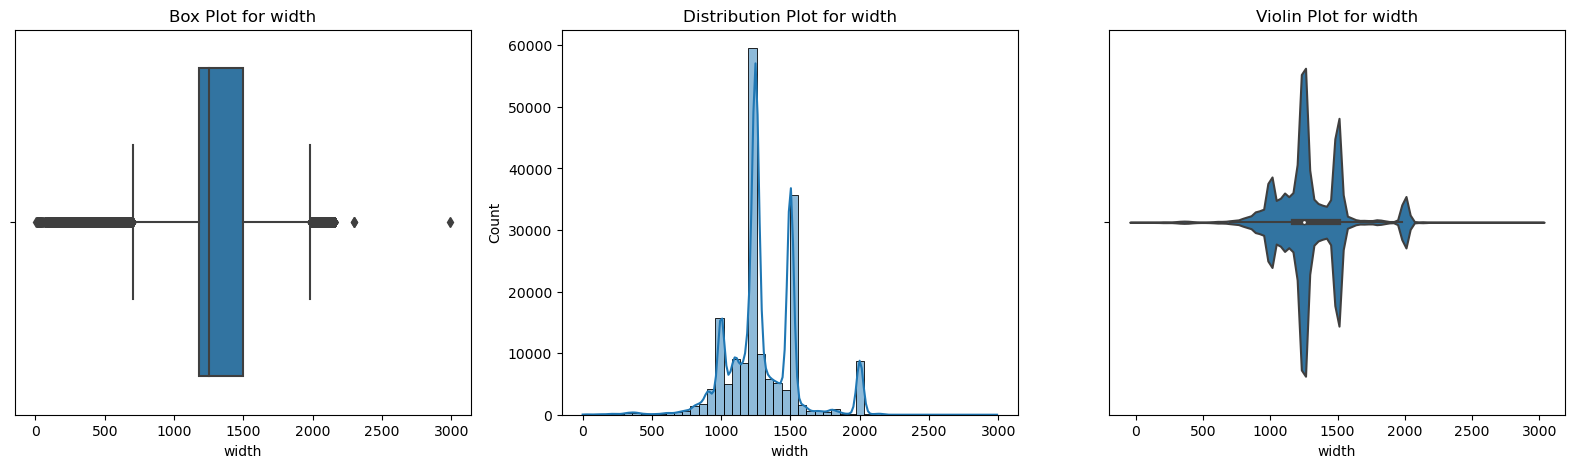

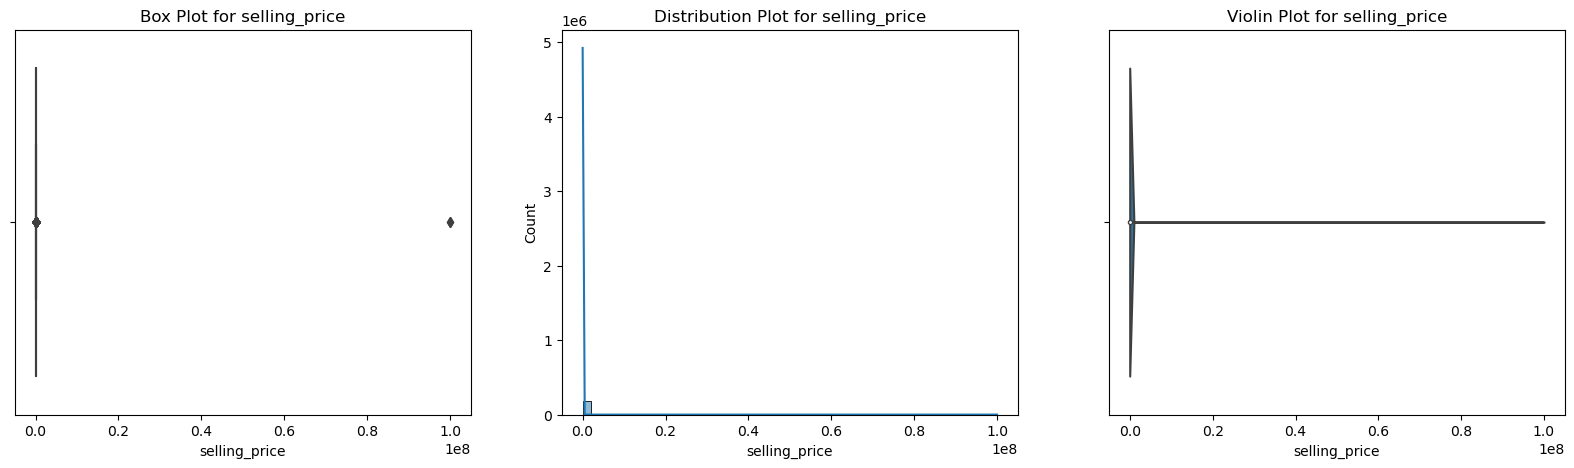

In [29]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [30]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1["customer_log"]= np.log(df["customer"])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,3.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,0.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,4.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,5.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,3.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,0.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,0.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,0.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,0.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


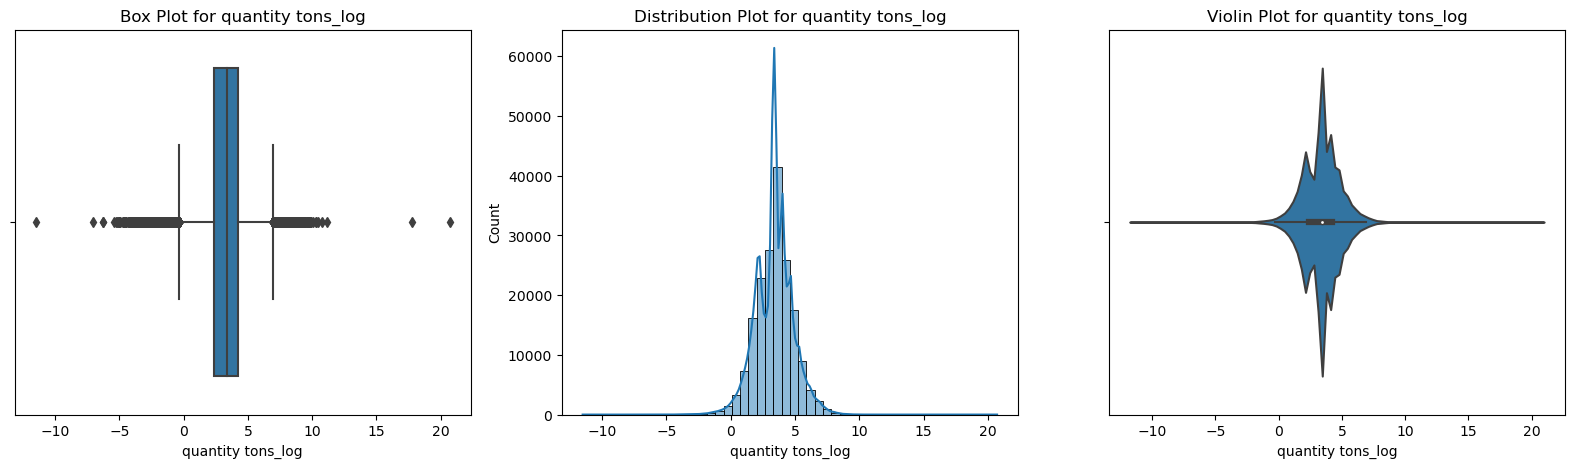

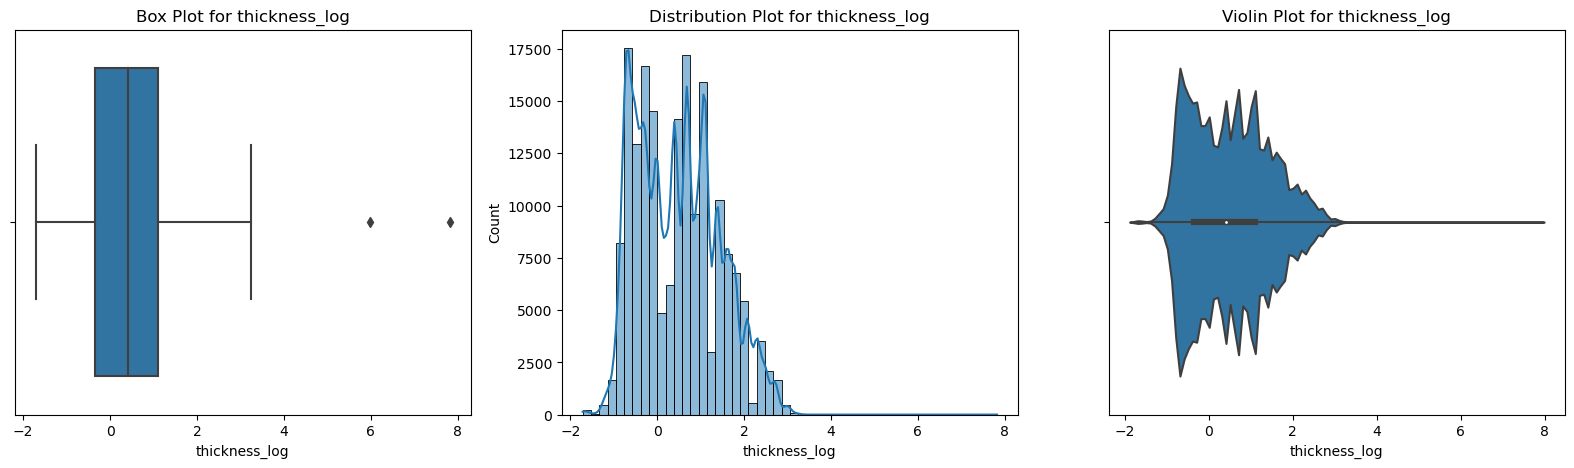

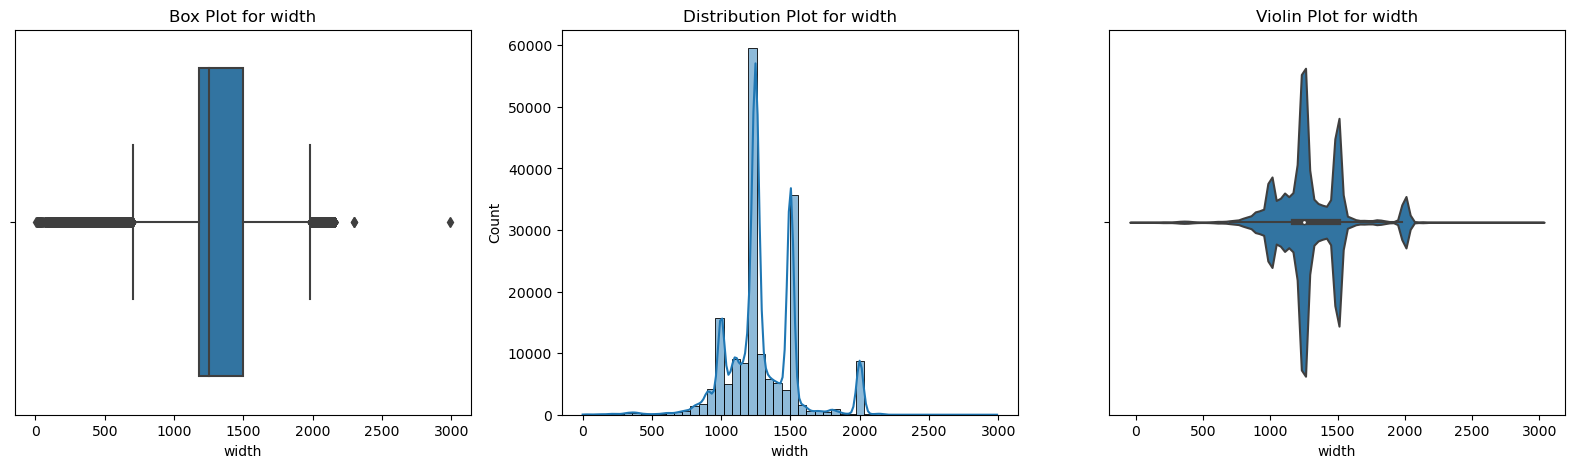

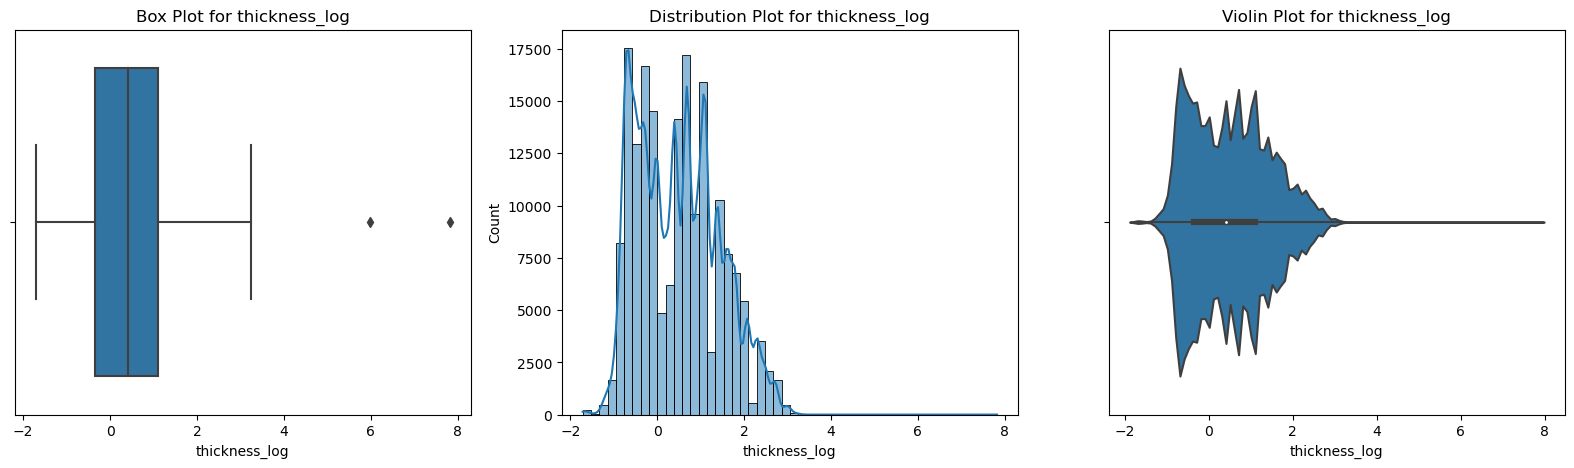

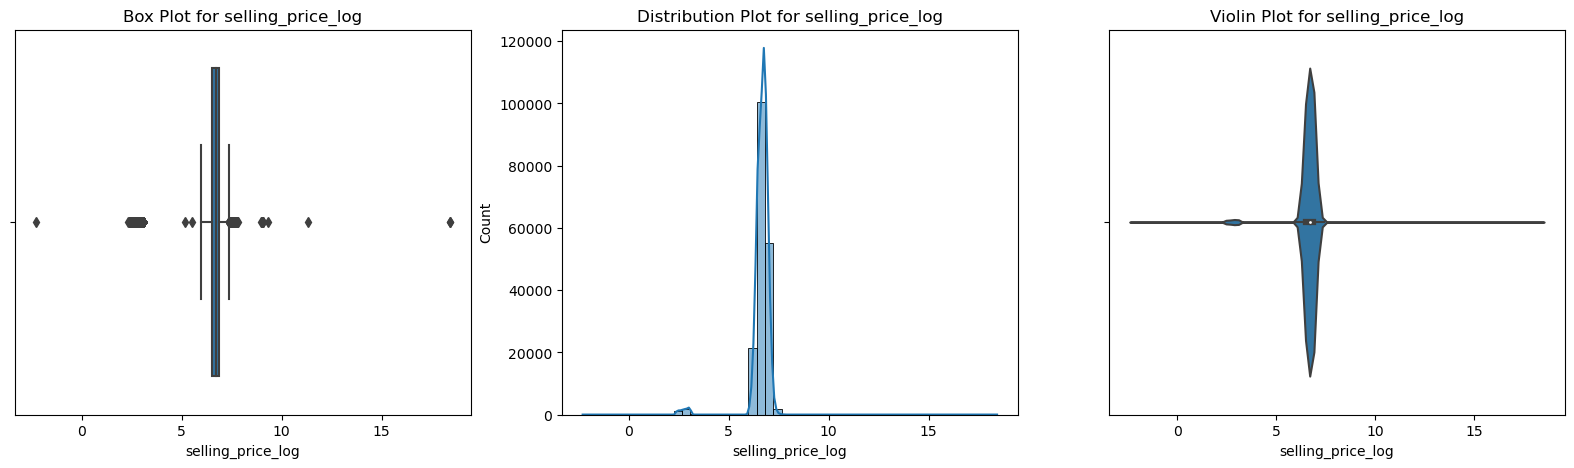

In [31]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width',"thickness_log", 'selling_price_log']:
    plot(df1, i)

In [32]:
df2 = df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,3.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,0.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,4.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,5.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,3.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,0.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,0.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,0.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,0.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


In [33]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [34]:

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'customer_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
outlier(df2, 'application')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,3.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,0.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,4.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,5.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,3.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,0.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,0.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,0.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,0.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


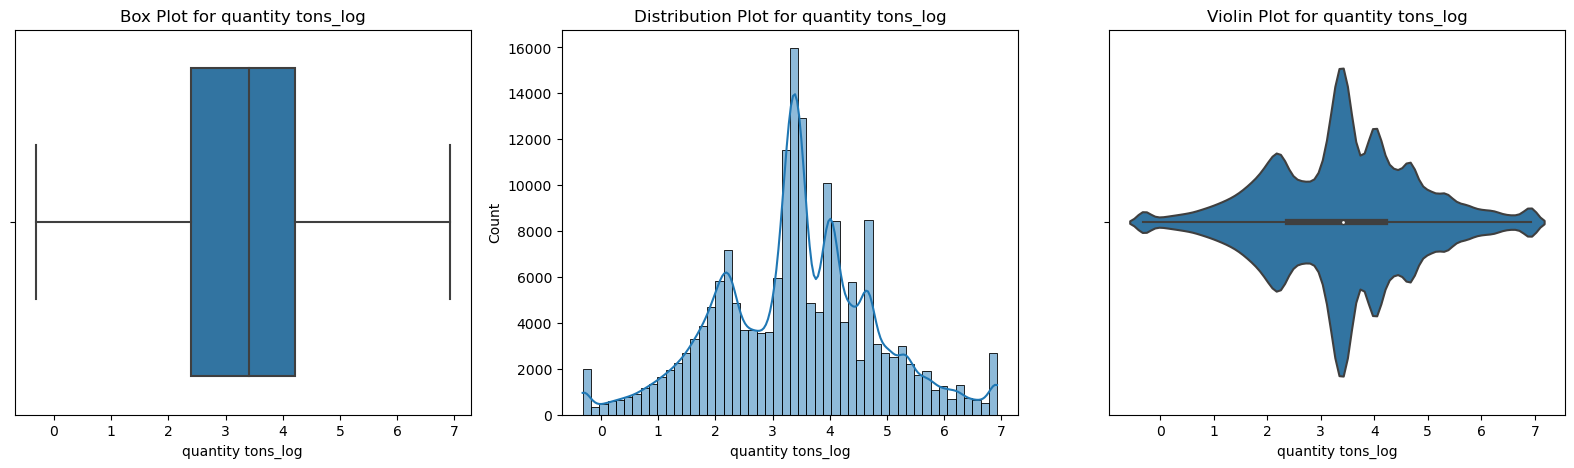

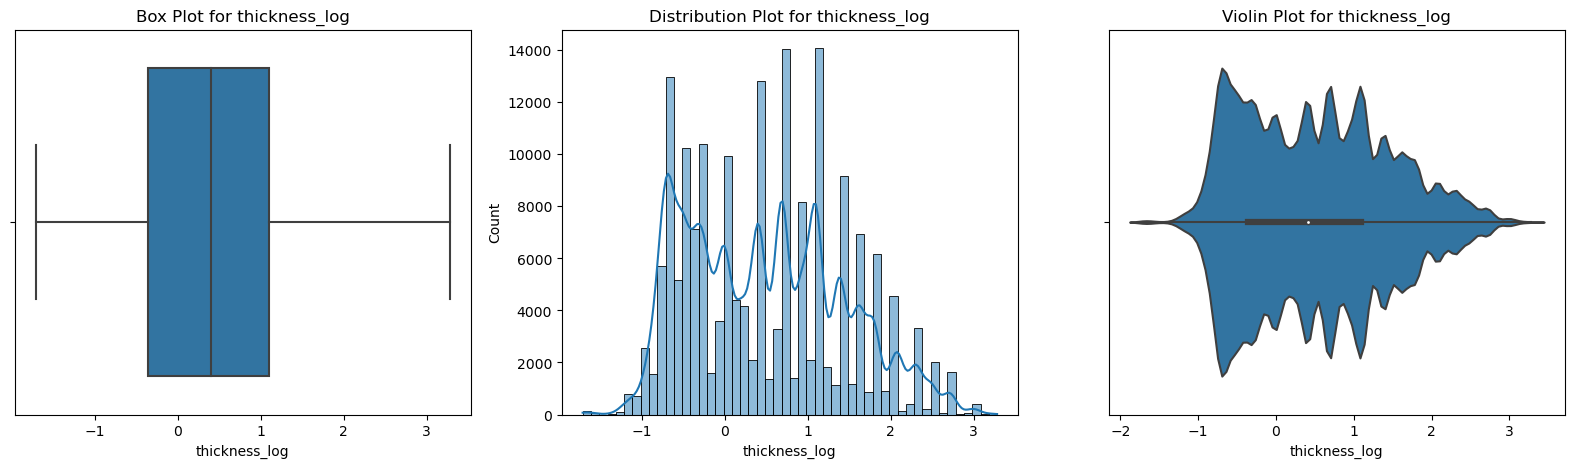

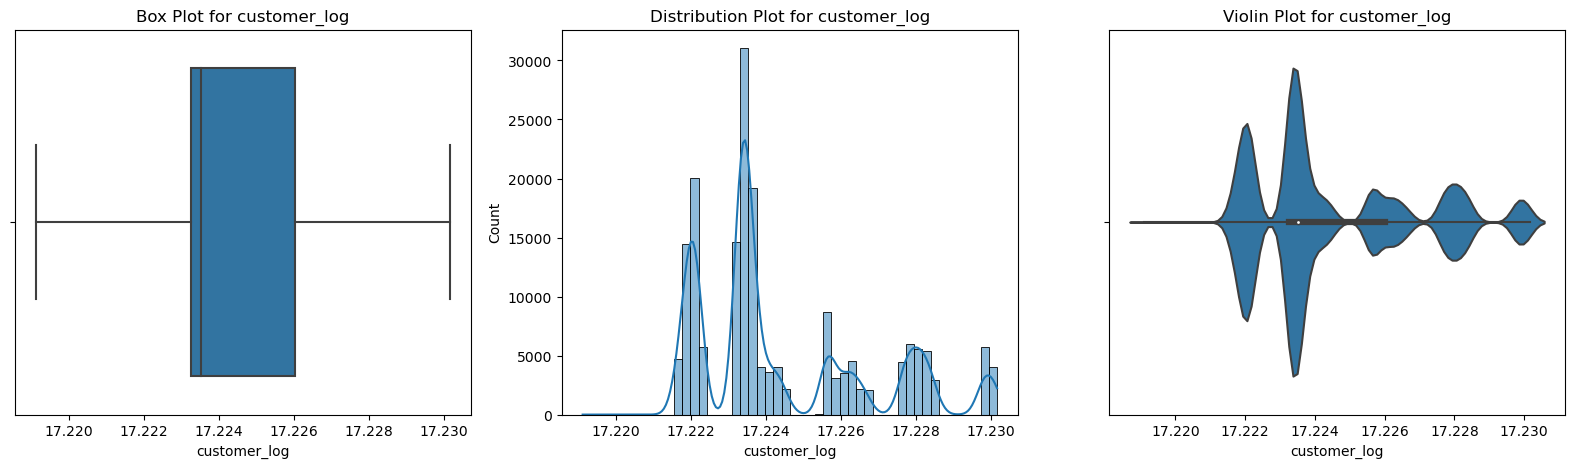

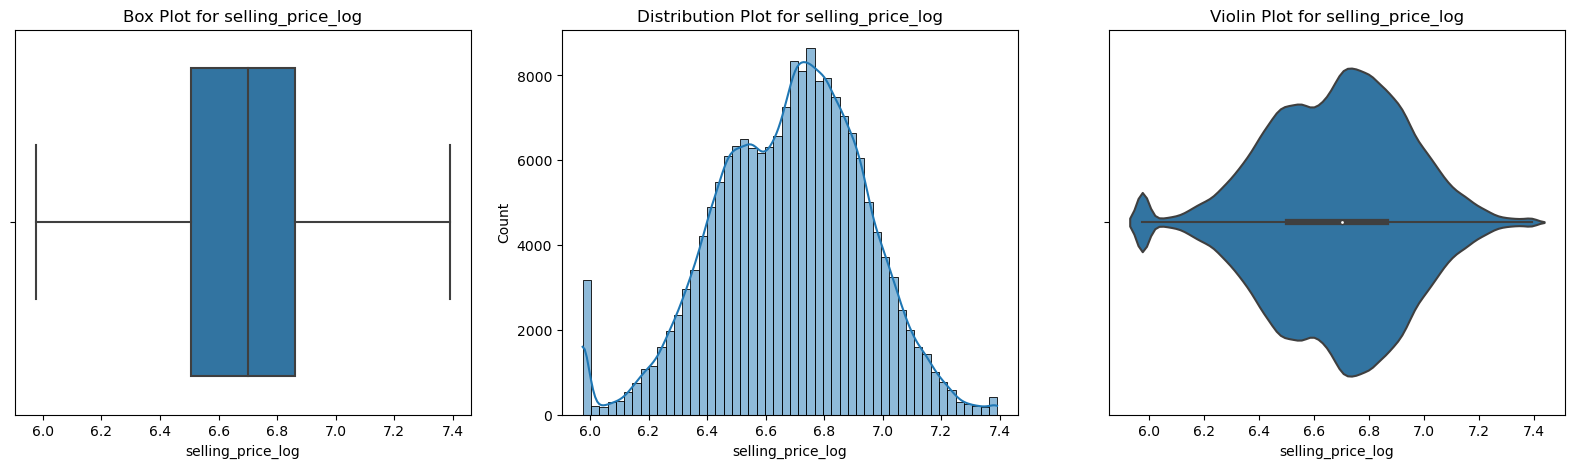

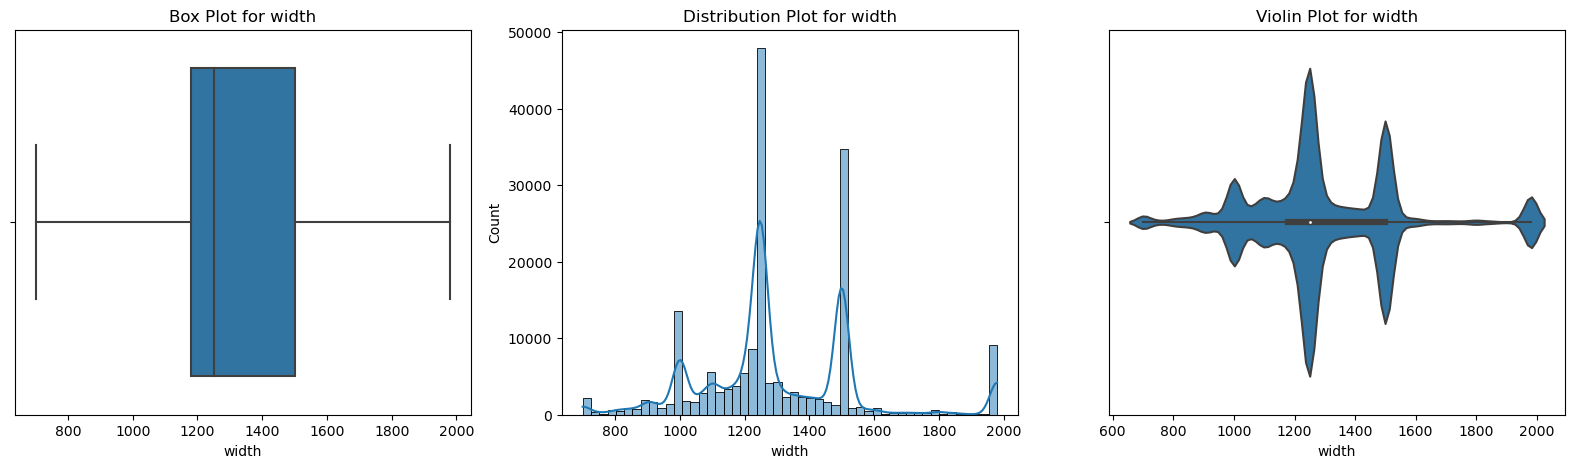

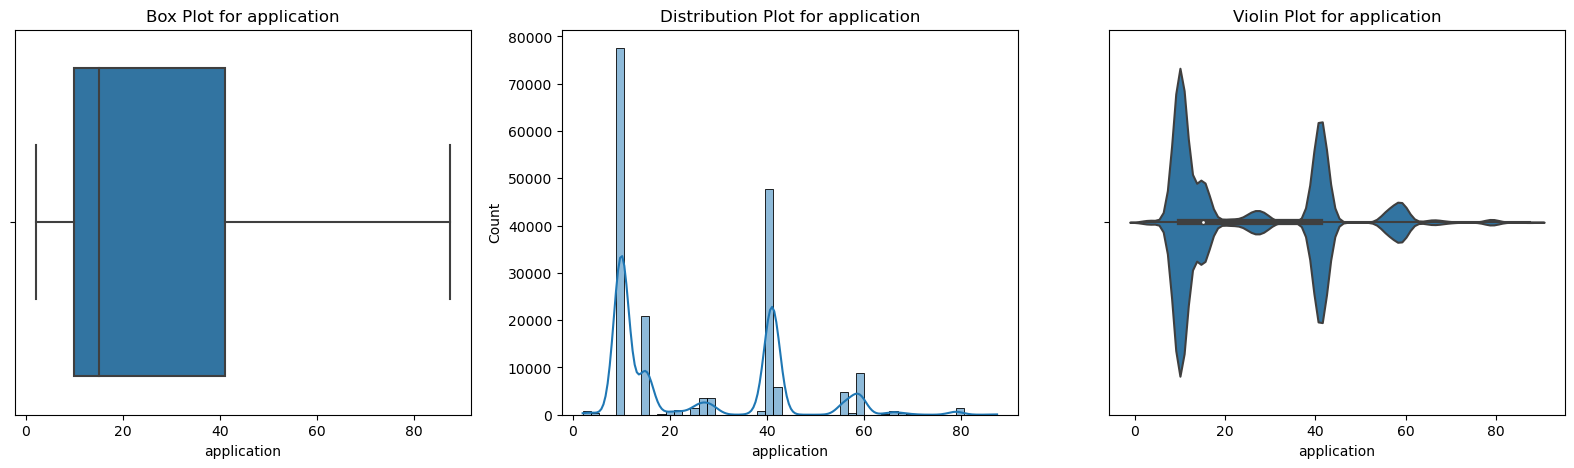

In [35]:

# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log', 'thickness_log','customer_log','selling_price_log','width','application']:
    plot(df2, i)

In [36]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df3= df2.drop(columns=["quantity tons","customer","thickness","selling_price"])
df3.head(5)     

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,3.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,0.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


<Axes: >

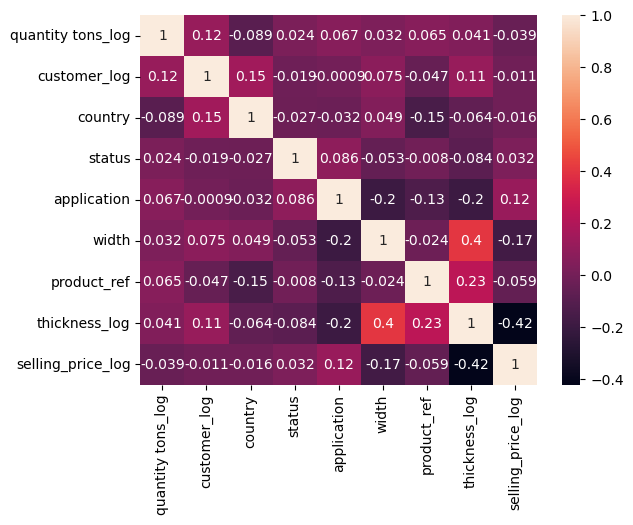

In [37]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons_log','customer_log','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [38]:
# The highest value is (0.4 or -0.42) only, So there is no columns are highly correlated and no need to drop any columns.

In [39]:
df4 = df3.copy()
df4

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,3.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,0.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,0.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,0.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


In [40]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.

In [41]:
# find the difference between item and delivery date and add the new column of dataframe

df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,3.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91
1,20210401.0,0.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0
2,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90
3,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90
4,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31


In [42]:

# convert the data type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year
df4
     

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,3.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,0.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,0.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
181669,20200702.0,0.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
181670,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
181671,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020


In [43]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_f1 = df4[df4['Date_difference']>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,3.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,0.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,0.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,20210401.0,4.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021
4,20210401.0,6.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,0.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,4.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,4.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,4.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020


In [44]:

# split the negative value of 'Date_difference' column in another dataframe
df_f2 = df4[df4['Date_difference']<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f2 = df_f2.reset_index(drop=True)
df_f2

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
2,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021
3,20210401.0,5.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,17.228050,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,5.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.228050,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,0.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,0.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020


In [45]:
# These 16108 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'delivery date' data (df_f1) and predict the 'Date_difference'(df_f2) using ML model.
     

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
df_f1.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery date_1',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [48]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [49]:

print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9998370998604944, 'Mean Absolute Error': 0.005556729985202186, 'Mean Squared Error': 0.25077764020173343, 'Root Mean Squared Error': 0.5007770364161415}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999840087599268, 'Mean Absolute Error': 0.011941231540482638, 'Mean Squared Error': 0.024638960529097337, 'Root Mean Squared Error': 0.1569680239064547}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9998849295249759, 'Mean Absolute Error': 0.008579409899435267, 'Mean Squared Error': 0.17701306737535102, 'Root Mean Squared Error': 0.4207292090826961}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7280960628827697, 'Mean Absolute Error': 17.08262518156888, 'Mean Squared Error': 419.02851160733246, 'Root Mean Squared Error': 20.47018592019458}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9854534989823085, 'Mean Absolute Error': 3.2442543125191103, 'Mean Squared Error': 22.571734856908623, 'Root Mean Squared Error': 4.750971990751853}


In [50]:
# train the model by using Random Forest Regression algorithm to predict 'Date difference'
# 'item_date_1','delivery date_1' - this columns are non-numerical and cannot passed, so skip the columns in model training and prediction.

def ml_date_difference():

    # train the model by using correct delivery date (df_f1) dataframe
    x = df_f1.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df_f1['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    # predict the 'Date_difference' of df_f2 columns using model
    y_pred_list = []

    for index, row in df_f2.iterrows():
        input_data = row.drop(['item_date_1','delivery date_1','Date_difference'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [51]:
import warnings
warnings.filterwarnings('ignore')
     

In [52]:
# Machine learning model predict the date difference of (df_f2) datafame
date_difference = ml_date_difference()
     

In [53]:
date_difference

[16.97,
 17.01,
 0.0,
 17.02,
 17.02,
 16.97,
 16.99,
 16.99,
 226.23,
 0.0,
 1.0,
 1.0,
 3.15,
 3.16,
 3.14,
 3.16,
 3.17,
 3.14,
 3.14,
 3.14,
 3.16,
 3.14,
 3.15,
 3.16,
 3.17,
 3.13,
 3.14,
 3.15,
 3.15,
 3.14,
 3.15,
 3.17,
 3.17,
 3.17,
 3.16,
 3.16,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.14,
 3.14,
 3.14,
 3.14,
 3.17,
 3.26,
 3.17,
 3.17,
 3.17,
 3.17,
 3.0,
 3.13,
 3.17,
 3.17,
 3.28,
 4.19,
 4.19,
 4.19,
 6.0,
 6.0,
 6.0,
 6.28,
 6.14,
 6.13,
 6.13,
 6.05,
 6.27,
 6.33,
 6.24,
 6.13,
 6.15,
 6.15,
 8.0,
 8.0,
 8.0,
 6.16,
 6.15,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 6.48,
 6.52,
 6.64,
 6.61,
 6.63,
 6.6,
 6.49,
 6.45,
 6.44,
 6.47,
 6.48,
 6.47,
 6.47,
 6.5,
 6.47,
 6.48,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 6.49,
 9.0,
 0.67,
 0.67,
 0.67,
 0.67,
 6.75,
 6.75,
 6.75,
 6.76,
 10.0,
 10.0,
 0.67,
 10.54,
 13.0,
 10.64,
 10.6,
 10.55,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 10.95,
 10.95,
 10.87,
 10.88,
 14.0,
 10.87,
 10.73,
 10.87,
 10.74,
 10.87,
 10.87,

In [54]:
# convert float values into integer using list comprehension method
date_difference1 = [int(round(i,0)) for i in date_difference]
date_difference1

[17,
 17,
 0,
 17,
 17,
 17,
 17,
 17,
 226,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 8,
 8,
 6,
 6,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 6,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 6,
 9,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 7,
 10,
 10,
 1,
 11,
 13,
 11,
 11,
 11,
 13,
 13,
 13,
 13,
 13,
 11,
 11,
 11,
 11,
 14,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 14,
 11,
 11,
 14,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 12,
 1,
 13,
 1,
 13,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 1,
 16,
 13,
 13,
 13,
 16,
 16,
 14,
 14,
 14,
 14,
 17,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 17,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 1

In [55]:
# add 'Date_difference' column in the dataframe
df_f2['Date_difference'] = pd.DataFrame(date_difference1)
df_f2

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,17,1,4,2021
1,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,17,1,4,2021
2,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,0,1,4,2021
3,20210401.0,5.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,17.228050,-0.385662,6.836259,17,1,4,2021
4,20210401.0,5.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.228050,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,0.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,0.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [56]:
# calculate delivery date (item_date + Date_difference = delivery_date)

def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime("%Y-%m-%d")

    return delivery_date

In [57]:
# find out the delivery date and add to dataframe

df_f2['item_date_1'] = pd.to_datetime(df_f2['item_date_1'])
df_f2['delivery date_1'] = df_f2.apply(lambda x: find_delivery_date(x['item_date_1'], x['Date_difference']), axis=1)
df_f2

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,4.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-18,5.956169,17.221827,-0.967584,6.468211,17,1,4,2021
1,20210401.0,5.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-18,5.310301,17.228293,0.832909,6.643790,17,1,4,2021
2,20210401.0,3.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-01,6.666354,17.223735,1.386294,6.357842,0,1,4,2021
3,20210401.0,5.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.730808,17.228050,-0.385662,6.836259,17,1,4,2021
4,20210401.0,5.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.736160,17.228050,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,0.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,0.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [58]:

# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_f1,df_f2], axis=0, ignore_index=True)
df_final

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,3.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,0.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,0.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,20210401.0,4.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021
4,20210401.0,6.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,0.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,0.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,0.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [59]:

# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)

df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])

df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)
df_final

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,0.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,0.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,4.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,6.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,0.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,0.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,0.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,0.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [60]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle
     

In [61]:
df_final.head()

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,0.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,0.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,4.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,6.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [62]:
# check data types
df_final.dtypes

country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons_log      float64
customer_log           float64
thickness_log          float64
selling_price_log      float64
item_date_day            int64
item_date_month          int64
item_date_year           int64
delivery_date_day        int64
delivery_date_month      int64
delivery_date_year       int64
dtype: object

In [63]:

df_c = df_final.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c
    

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,0.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,0.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
4,6.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
5,0.0,1,5.0,41.0,1165.0,1668701718,6.446714,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,0.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,0.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,0.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,0.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [64]:
# check no of rows (records) of each 1 and 0 in dataframe
df_c['status'].value_counts()

1    116012
0     34438
Name: status, dtype: int64

In [65]:

# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = df_c.drop('status', axis=1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [66]:
x.shape, y.shape, x_new.shape, y_new.shape

((150450, 15), (150450,), (230290, 15), (230290,))

In [67]:

# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [68]:

print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9621564114811759}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9853228537930435}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.999994572061314, 'accuracy_test': 0.9816969907507925}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7737309479352121, 'accuracy_test': 0.7758695557774979}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8196947327282991, 'accuracy_test': 0.8213556819662166}


In [69]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [70]:

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [71]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [72]:

grid_search.best_score_

0.9672803792311109

In [73]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test
     

(0.9854911198923096, 0.9688653436970776)

In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [74]:

# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))
     

[[23007   270]
 [ 1198 21583]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23277
           1       0.99      0.95      0.97     22781

    accuracy                           0.97     46058
   macro avg       0.97      0.97      0.97     46058
weighted avg       0.97      0.97      0.97     46058



In [75]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9679064421826663


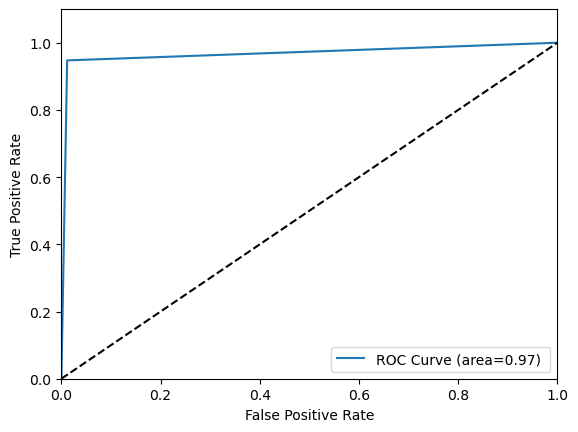

In [76]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [77]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [79]:

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.1, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [80]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [84]:
# load pickle model to predict the status (like Trained brain).

with open(r'C:\Users\Hp15\Desktop\copper_modelling\classification_model.pkl','rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


Regression Method - Prdict Selling Price

In [85]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle

In [86]:

df_final

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,0.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,0.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,4.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,6.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,0.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,0.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,0.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,0.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [87]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [88]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [89]:

print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999206991163908, 'R2_test': 0.9252324289822556}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999206991163908, 'R2_test': 0.9547882762298353}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940078045692052, 'R2_test': 0.9570858878175277}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6539127928444874, 'R2_test': 0.6526593895224642}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8875023738414992, 'R2_test': 0.887715118908223}


In [ ]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [90]:

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [91]:

# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9531143046311172)

In [92]:

# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9865392433129031, 0.9565010107360108)

In [93]:
# before hypertuning = 'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940176821065443, 'R2_test': 0.9572742394942817

# compare before and after hypertuning, reduced the overfitting in training

In [94]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9562659753299437,
 'Mean Absolute Error': 0.03244910368442661,
 'Mean Squared Error': 0.0028795834901342264,
 'Root Mean Squared Error': 0.05366175071812535}

In [95]:
# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

7.140921542076688

In [96]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

1262.5913842277537

In [97]:

# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [99]:
# load the pickle model to predict selling price

with open(r'C:\Users\Hp15\Desktop\copper_modelling\regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])
     

1262.5913842277537